## Machine learning Model for Auto Insurance Industry

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. Description </h2>

<p>Auto insurance industry is witnessing a paradigm shift.  Since auto insurance is a homogenous good (difficult to differentiate product A from product B), companies are fighting a price war.  On top of that,distribution channel is shifting more from traditional insurance brokers to online purchase. This means that ability for companies to interact through human touch point is limited and customer should be quoteda good price. A good price quote is one which makes customer purchase the policy and helps the company to increase the profits.Also, the insurance premium is calculated based on more than 50+ parameters. This means that traditional business analytics-based algorithms are now limited in their ability to differentiate among customers based on subtle parameters</p>




<h2> 1.2. Problem Statement </h2>


<p>Build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.</p>

<h2> 1.3. Use Cases </h2>


<p>The modelshall mainly support the following use cases:
    1)Conquering Market Share: It should be possible to conquer market share by lowering the prices of the premium for the
    customers, who are least likely to claim.
    2)Risk Management: It should be possible to charge right premium from the customer, who is likely to claim insurance in the     coming year
    3)SmoothProcessing: It  should  be  possible  to reduce  the  complexity  of  pricing  models,  as with   majority   of         transactions   happening   online   and   with   more   customer   attributes available  (thanks  to  internet  and  social     media),  time  is  ripe  to  harness  the  power  of  dataand build complex ML models.
    4)Increased Profits:As per industry estimate 1% reduction in claim can boost profit by 10%. So, through ML model we can         identify and deny the insurance to driver who will make the claim.  Thus, ensuring reduced claim out go and increased           profit.
    </p>

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<p>Data is in csv files.</p>
<ul>
  <li><b>train.csv</b> contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.</li>
  <li><b>test.csv</b> contains the test data.</li>
</ul>


<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>


<p>
    It is a classification problem to predict the data point belongs to 0 or 1 class.
</p>
<ul>
    <ul>0 ---> no claim's for insurance </ul>
    <ul>1 ---> claim's for insurance</ul>
</ul>

<h3>2.2.2. Performance Metric</h3>


Metric(s): 
* auc 
* Normalized Gini Coefficient


<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV

In [2]:
train = pd.read_csv('train.csv')     #read csv file
test = pd.read_csv('test.csv')

In [66]:
train.shape

(595212, 59)

In [0]:
train.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


<p>1.Feature names with the postfix bin to indicate binary features.</p>
<p>2.Feature names with the postfix cat to indicate categorical features.</p>
<p>3.Values of -1 indicate that the values are missing.</p>

In [0]:
test.shape

(892816, 58)

In [0]:
test.head(5)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [0]:
train.drop_duplicates()         #code to drop duplicates
train.shape

(595212, 59)

<p>There are no duplicate values.</p>

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

<p>Data in the training set has only numerical values.</p>

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

<p>Test set also contains only numerical values.</p>

<h3>Dataset analysis</h3>

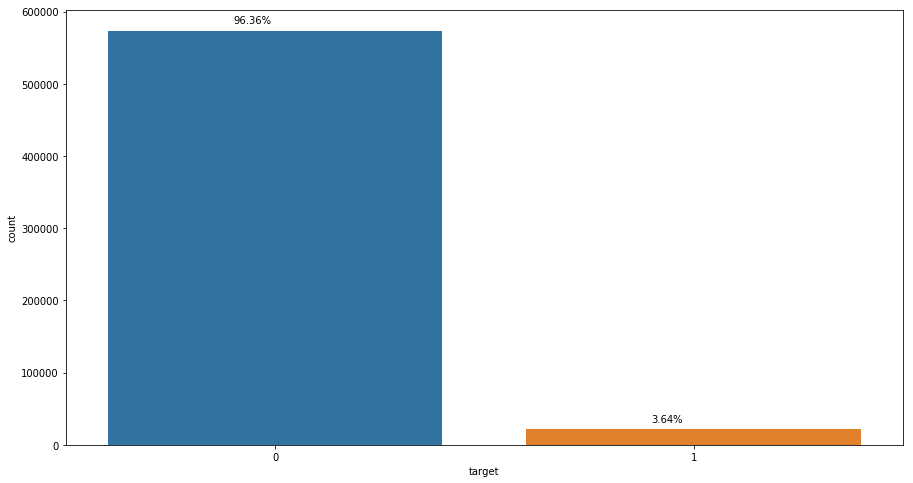

In [0]:
plt.figure(figsize=(15,8))

axis = sns.countplot('target', data=train)
for p in axis.patches:
    axis.annotate('{:.2f}%'.format(100*p.get_height()/len(train['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

<p>1.Train data set contains mostly of 0 classified rows.</p>
<p>2.Data is highly imbalanced.</p>

<h3>Classification of Features</h3>

In [3]:
data = []
feature_data = {}
for feature in train.columns:
         
    if 'bin' in feature or feature == 'target':
        level = 'binary'
    elif 'cat' in feature or feature == 'id':
        level = 'nominal'
    elif train[feature].dtype == float:
        level = 'interval'
    elif train[feature].dtype == int:
        level = 'ordinal'
    
    dtype = train[feature].dtype
    
    feature_dict = {
        'feature': feature,
        'level': level,
        'dtype': dtype
    }
    feature_data[feature] = level
    data.append(feature_dict)
    
feature_description = pd.DataFrame(data, columns=['feature', 'level', 'dtype'])
feature_description.set_index('feature', inplace=True)

In [69]:
feature_description

,level,dtype
feature,,
id,nominal,int64
target,binary,int64
ps_ind_01,ordinal,int64
ps_ind_02_cat,nominal,int64
ps_ind_03,ordinal,int64
ps_ind_04_cat,nominal,int64
ps_ind_05_cat,nominal,int64
ps_ind_06_bin,binary,int64
ps_ind_07_bin,binary,int64


<p>The above table shows how the data is classified.</p>

In [0]:
pd.DataFrame({'count' : feature_description.groupby(['level']).size()}).reset_index()

,level,count
0,binary,17
1,interval,10
2,nominal,15
3,ordinal,16


<p>The above table explains how many features are classified into different levels.</p>

<IPython.core.display.Javascript object>


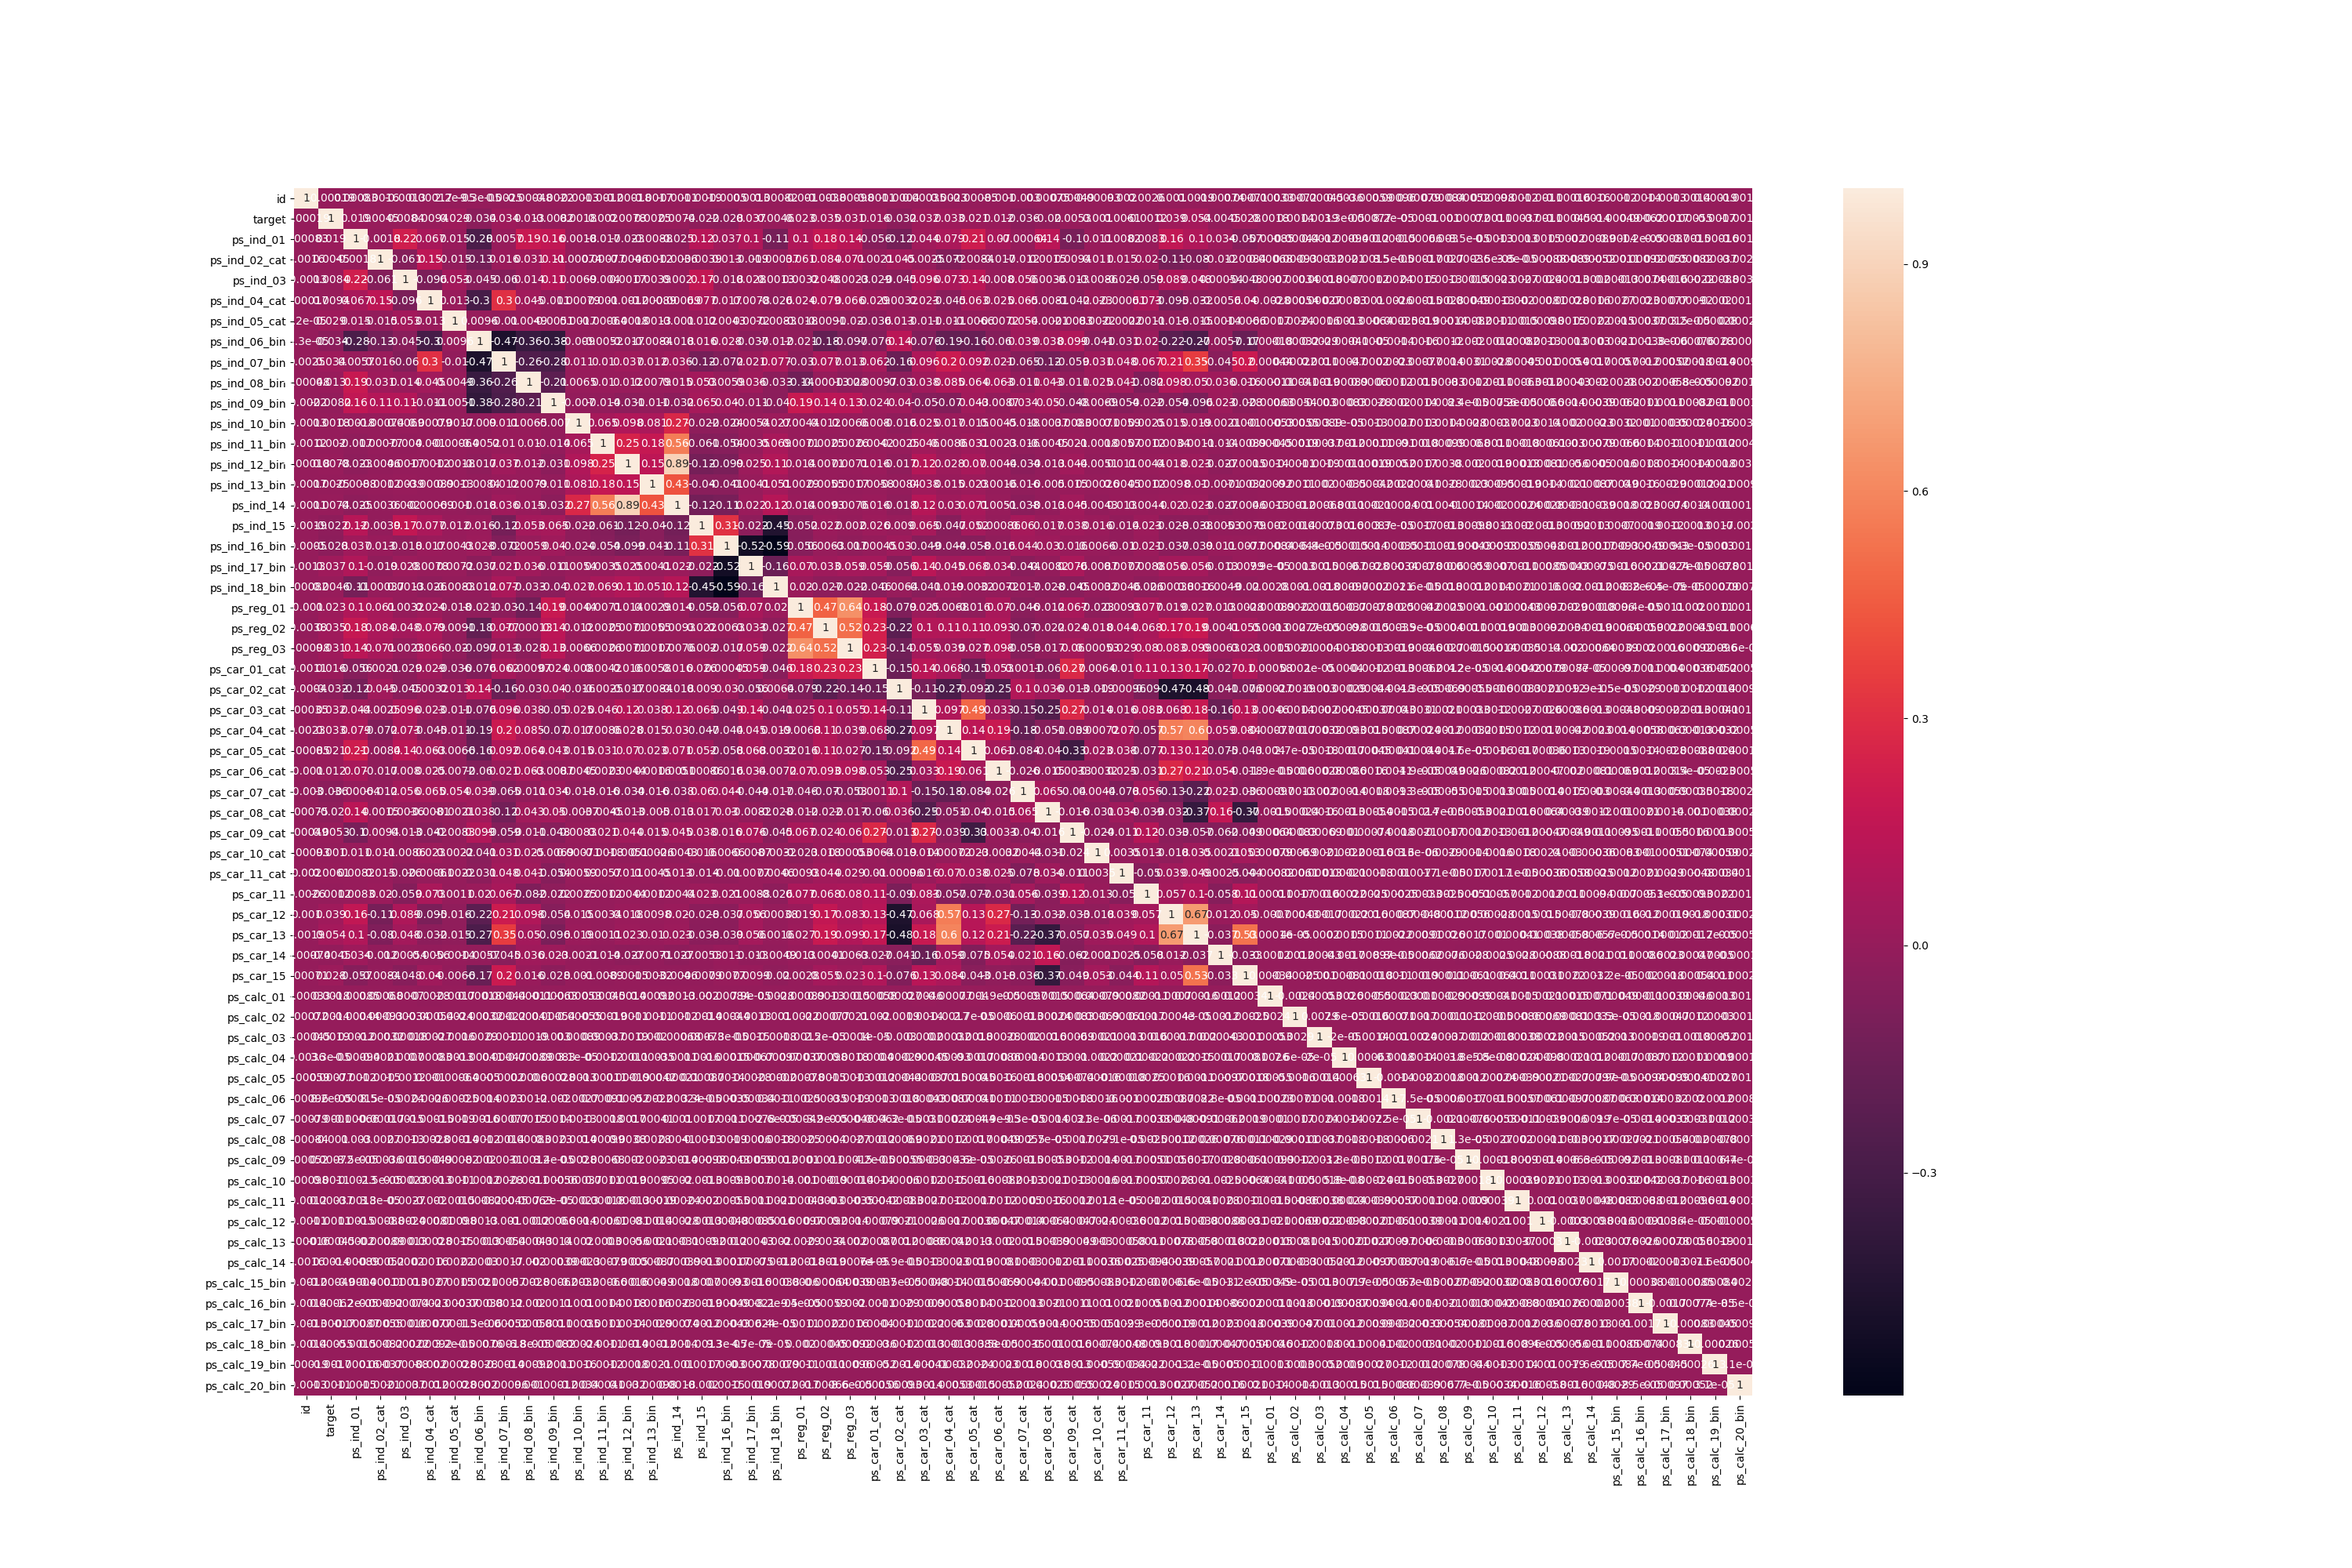

In [0]:
correlations = train.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlations, 
        xticklabels=correlations.columns,
        yticklabels=correlations.columns,annot=True)
plt.show()

<p>The heat map explains there are zero features that have value greater than 0.95.</p>

<h3>Train Missing values</h3>

In [4]:
features_with_missing_values_train = []

for feature in train.columns:
    missing = train[train[feature] == -1][feature].count()
    if missing > 0:
        features_with_missing_values_train.append(feature)
        missing_percentage = missing/train.shape[0]
        
        print('{} has {} records ({:.2%}) with missing values'.format(feature, missing, missing_percentage))
        
print('There are {} variables with missing values'.format(len(features_with_missing_values_train)))

ps_ind_02_cat has 216 records (0.04%) with missing values
ps_ind_04_cat has 83 records (0.01%) with missing values
ps_ind_05_cat has 5809 records (0.98%) with missing values
ps_reg_03 has 107772 records (18.11%) with missing values
ps_car_01_cat has 107 records (0.02%) with missing values
ps_car_02_cat has 5 records (0.00%) with missing values
ps_car_03_cat has 411231 records (69.09%) with missing values
ps_car_05_cat has 266551 records (44.78%) with missing values
ps_car_07_cat has 11489 records (1.93%) with missing values
ps_car_09_cat has 569 records (0.10%) with missing values
ps_car_11 has 5 records (0.00%) with missing values
ps_car_12 has 1 records (0.00%) with missing values
ps_car_14 has 42620 records (7.16%) with missing values
There are 13 variables with missing values


In [72]:
for i in features_with_missing_values_train:
    print("{}---------->{}".format(i,feature_data[i]))

ps_ind_02_cat---------->nominal
ps_ind_04_cat---------->nominal
ps_ind_05_cat---------->nominal
ps_reg_03---------->interval
ps_car_01_cat---------->nominal
ps_car_02_cat---------->nominal
ps_car_03_cat---------->nominal
ps_car_05_cat---------->nominal
ps_car_07_cat---------->nominal
ps_car_09_cat---------->nominal
ps_car_11---------->ordinal
ps_car_12---------->interval
ps_car_14---------->interval


<p>All missing features contains integers and float values</p>

In [73]:
for f in features_with_missing_values_train:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_reg_03 has 5013 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_11 has 5 distinct values
Variable ps_car_12 has 184 distinct values
Variable ps_car_14 has 850 distinct values


<p>ps_reg_03, ps_car_12 and ps_car_14 features has high number of distinct values they are float values. </p>

<h2>Test Missing Values</h2>

In [74]:
features_with_missing_values_test = []

for feature in test.columns:
    missing = test[test[feature] == -1][feature].count()
    if missing > 0:
        features_with_missing_values_test.append(feature)
        missing_percentage = missing/test.shape[0]
        
        print('{} has {} records ({:.2%}) with missing values'.format(feature, missing, missing_percentage))
        
print('There are {} variables with missing values'.format(len(features_with_missing_values_test)))

ps_ind_02_cat has 307 records (0.03%) with missing values
ps_ind_04_cat has 145 records (0.02%) with missing values
ps_ind_05_cat has 8710 records (0.98%) with missing values
ps_reg_03 has 161684 records (18.11%) with missing values
ps_car_01_cat has 160 records (0.02%) with missing values
ps_car_02_cat has 5 records (0.00%) with missing values
ps_car_03_cat has 616911 records (69.10%) with missing values
ps_car_05_cat has 400359 records (44.84%) with missing values
ps_car_07_cat has 17331 records (1.94%) with missing values
ps_car_09_cat has 877 records (0.10%) with missing values
ps_car_11 has 1 records (0.00%) with missing values
ps_car_14 has 63805 records (7.15%) with missing values
There are 12 variables with missing values


In [75]:
for i in features_with_missing_values_test:
    print("{}---------->{}".format(i,feature_data[i]))

ps_ind_02_cat---------->nominal
ps_ind_04_cat---------->nominal
ps_ind_05_cat---------->nominal
ps_reg_03---------->interval
ps_car_01_cat---------->nominal
ps_car_02_cat---------->nominal
ps_car_03_cat---------->nominal
ps_car_05_cat---------->nominal
ps_car_07_cat---------->nominal
ps_car_09_cat---------->nominal
ps_car_11---------->ordinal
ps_car_14---------->interval


In [76]:
for f in features_with_missing_values_test:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_reg_03 has 5013 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_11 has 5 distinct values
Variable ps_car_14 has 850 distinct values


<h3>Filling missing values</h3>

In [0]:
#missing values i.e -1 are fileed with nan such that we can easily obtain the rows which has missing values 

train = train.replace(-1, np.nan) 
test = test.replace(-1, np.nan)     

In [0]:
#params are used to store the features which don't have missing values

params = list(test.columns)
for c in features_with_missing_values_train:
    params.remove(c)
params.remove('id')
params.remove('target')

In [1]:
for feature in features_with_missing_values_train:
    train_new = train[params+[feature]]
    ind = train.loc[pd.isna(train[feature]), :].index
    train_new = train_new.dropna()
    y_new = train_new[feature]
    train_new = train_new.drop([feature],axis=1)
    
    
    if feature_data[feature] == 'interval':
        model = LinearRegression()
        model.fit(train_new,y_new)
        
        for i in ind:
            train[feature].loc[i] = model.predict(train[params].loc[i].values.reshape(1, -1)) 
            
        if feature in features_with_missing_values_test:
            ind = test.loc[pd.isna(test[feature]), :].index   
            for i in ind:
                test[feature].loc[i] = model.predict(test[params].loc[i].values.reshape(1, -1)) 
            
    else:
        grid = {'C' : [10 ** x for x in range(-5, 3)]}
        clf = GridSearchCV(LogisticRegression(penalty='l2' , class_weight='balanced'),param_grid=grid,n_jobs=-1)
        clf.fit(train_new,y_new)
        model=LogisticRegression(penalty='l2' ,C=clf.best_params_['C'], class_weight='balanced')
        model.fit(train_new,y_new)
        
        for i in ind:
            train[feature].loc[i] = model.predict(train[params].loc[i].values.reshape(1, -1))  
        
        if feature in features_with_missing_values_test:
            ind = test.loc[pd.isna(test[feature]), :].index 
            for i in ind:
                test[feature].loc[i] = model.predict(test[params].loc[i].values.reshape(1, -1)) 

print("completed")

completed


In [2]:
train = pd.read_pickle('./train_processed')
test = pd.read_pickle('./test_processed')

In [5]:
train.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [6]:
test.isna().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [2]:
train = pd.read_pickle("./train_processed")
test = pd.read_pickle("./test_processed")

<h3>Categorcal features</h3>

In [3]:
categorical_features = [a for a in train.columns if a.endswith('cat')]

for feature in categorical_features:
    temp = pd.concat([train[feature], test[feature]])
    temp = pd.get_dummies(pd.Series(temp))
    
    for i in temp.columns:
        temp = temp.rename(columns = {i: str(feature)+"_"+str(i)})
    temp1 = temp.iloc[:train.shape[0],:]
    temp2 = temp.iloc[train.shape[0]:, :]
    
    train = pd.concat([train,temp1],axis=1)
    train = train.drop([feature],axis=1)
    
    test = pd.concat([test,temp2],axis=1)
    test = test.drop([feature],axis=1)

<p>The above code is for converting categorical features into one hot encoded.</p>

In [4]:
print(train.shape)
print(test.shape)

(595212, 220)
(892816, 219)


<p>After performing feature engineering, finally the total number of features are 160.</p>

In [5]:
train.to_pickle('./train_final_new')
test.to_pickle('./test_final_new')

In [2]:
train_final = pd.read_pickle("./train_final_new")
test_final = pd.read_pickle("./test_final_new")

In [3]:
y = train_final['target']
train = train_final.drop(['id','target'],axis=1)
test = test_final.drop(['id'],axis=1)

<h2>Train teat split</h2>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train.values, y.values, stratify = y, test_size=0.25)

In [5]:
kf = StratifiedKFold(n_splits=5)

In [6]:
#The code is taken from this https://www.kaggle.com/xiaozhouwang/2nd-place-lightgbm-solution
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # sort rows on prediction column
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # get Lorenz curves
    L_true = np.cumsum(true_order) * 1. / np.sum(true_order)
    L_pred = np.cumsum(pred_order) * 1. / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # normalize to true Gini coefficient
    return G_pred * 1. / G_true

<h2>Models</h2>

<h3>Logistic Regression</h3>

In [7]:

log = SGDClassifier(loss='log')
param = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000],'max_iter':[5, 10, 20, 50, 100, 1000] ,'learning_rate':['constant','optimal','invscaling','adaptive'],'eta0':[0.01,0.001,0.0001]}
clf = GridSearchCV(log,param,scoring='roc_auc',refit=True,cv=3,n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000}

In [8]:
cv_auc_score=[]
test_auc_score=[]
test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    lr = SGDClassifier(loss='log',alpha= 0.0001, eta0= 0.01, learning_rate= 'adaptive', max_iter= 1000)
    lr.fit(xtr, ytr)
    pred_cv = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = lr.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test
  
    test_output[:, i] = lr.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)

test_out = test_output.mean(axis=1)

cv auc_score: 0.6260289389368568
test auc_score: 0.6274570390827987


In [9]:
Gini(y_test, test_model)

0.25613216204020595

In [10]:
final = pd.DataFrame(columns = ['id', 'target']) 

In [11]:
final['id'] = test_final['id']

In [12]:
final['target'] = test_out

In [13]:
final.to_csv('log_imbal.csv', index=False)

<h3>SVM</h3>

In [ ]:

svm = SGDClassifier(loss='hinge')
param = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000],'max_iter':[5, 10, 20, 50, 100, 1000] ,'learning_rate':['constant','optimal','invscaling','adaptive'],'eta0':[0.01,0.001,0.0001]}
clf = GridSearchCV(svm,param,scoring='roc_auc',refit=True,cv=3,n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

In [7]:
cv_auc_score=[]
test_auc_score=[]
test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))
for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    svm = SGDClassifier(loss='hinge',alpha= 0.001, eta0= 0.0001, learning_rate= 'optimal', max_iter= 50)
    svm.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(svm, method="sigmoid")    
    sig_clf.fit(xtr, ytr) 
    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test  
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)

test_out = test_output.mean(axis=1)

cv auc_score: 0.596776333905572
test auc_score: 0.6037607587403568


In [8]:
Gini(y_test, test_model)

0.2300178065309136

In [9]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('svm_imbal.csv', index=False)

<h3>Decision Tree Classifier</h3>

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
param = {"max_depth": [3,5,8,10,12], 
              "max_features": [1,3,5,7,10], 
              "min_samples_leaf": [1,3,5,7,10], 
              "criterion": ["gini", "entropy"]}
clf = GridSearchCV(dtc,param,scoring='roc_auc',refit=True,cv=3,n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 1}

In [14]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    dtc = DecisionTreeClassifier(random_state=0,criterion= 'entropy',max_depth=10,max_features= 5,min_samples_leaf= 1)
    dtc.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(dtc, method="sigmoid")    
    sig_clf.fit(xtr, ytr) 
    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test   
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)


cv auc_score: 0.5970082554549532
test auc_score: 0.5932938328241213


In [15]:
Gini(y_test, test_model)

0.19967246080745504

In [16]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('dtc_imbal.csv', index=False)

In [50]:
final.to_csv('dtc_imbal.csv', index=False)

<h3>Random forest</h3>

In [7]:

rf = RandomForestClassifier(random_state = 42)
param = {'n_estimators': [200, 400, 600, 800, 1000],
         'max_depth':[3,5,7,10],
         "min_samples_leaf": [1,3,5,7,10]}
clf = GridSearchCV(rf, param,scoring='roc_auc',refit=True, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 1000}

In [8]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    rf = RandomForestClassifier(random_state=42,n_estimators= 1000,max_depth=10,min_samples_leaf= 10,n_jobs=-1)
    rf.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(rf, method="sigmoid")    
    sig_clf.fit(xtr, ytr) 
    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test    
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6312001836369368
test auc_score: 0.6311041559798575


In [9]:
Gini(y_test, test_model)

0.2629019374378786

In [10]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('rf_imbal.csv', index=False)

In [17]:
final.to_csv('rf_imbal.csv', index=False)

<h3>XGBoost</h3>

In [11]:

xgb = XGBClassifier()
param = {'n_estimators':[100,200,500,1000],
         'max_depth':[3,5,7,10] }
clf = GridSearchCV(xgb, param,scoring='roc_auc',refit=True, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [12]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    xgb = XGBClassifier(random_state=42,n_estimators= 100,max_depth=3)
    xgb.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
    sig_clf.fit(xtr, ytr) 
    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test   
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6386563398057848
test auc_score: 0.6374180521945663


In [13]:
Gini(y_test, test_model)

0.2786445164486697

In [14]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_imbal.csv', index=False)

In [14]:
final.to_csv('xgb_imbal.csv', index=False)

<h2>Tree balanced</h2>

<h3>logistic</h3>

In [15]:

log = SGDClassifier(loss='log',class_weight="balanced")
param = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000],'max_iter':[5, 10, 20, 50, 100, 1000] ,'learning_rate':['constant','optimal','invscaling','adaptive'],'eta0':[0.01,0.001,0.0001]}
clf = GridSearchCV(log,param,scoring='roc_auc',refit=True,cv=3,n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 100}

In [16]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    lr = SGDClassifier(loss='log',class_weight="balanced",alpha= 0.001, 
                       eta0= 0.01, learning_rate= 'adaptive', max_iter= 100)
    lr.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")    
    sig_clf.fit(xtr, ytr)
    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6270605401363715
test auc_score: 0.6248587216943703


In [17]:
Gini(y_test, test_model)

0.25081116109107116

In [18]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('log_bal.csv', index=False)

In [28]:
final.to_csv('log_bal.csv', index=False)

<h3>SVM</h3>

In [19]:

svm = SGDClassifier(loss='hinge',class_weight="balanced")
param = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000],'max_iter':[5, 10, 20, 50, 100, 1000] ,'learning_rate':['constant','optimal','invscaling','adaptive'],'eta0':[0.01,0.001,0.0001]}
clf = GridSearchCV(svm,param,scoring='roc_auc',refit=True,cv=3,n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'adaptive', 'max_iter': 1000}

In [20]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    svm = SGDClassifier(loss='hinge',class_weight="balanced",alpha= 0.001, 
                        eta0= 0.001, learning_rate= 'adaptive', max_iter= 1000)
    svm.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(svm, method="sigmoid")    
    sig_clf.fit(xtr, ytr)     
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6269765349751311
test auc_score: 0.6244630446101336


In [21]:
Gini(y_test, test_model)

0.24986121163989714

In [22]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('svm_bal.csv', index=False)

In [12]:
final.to_csv('svm_bal.csv', index=False)

<h3>Decision Tree Classifier</h3>

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight="balanced")
param = {"max_depth": [3,5,8,10], 
              "max_features": [1,3,5,7,10], 
              "min_samples_leaf": [1,3,5,7,10], 
              "criterion": ["gini", "entropy"]}
clf = GridSearchCV(dtc,param,scoring='roc_auc',refit=True,cv=3,n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 10}

In [24]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    dtc = DecisionTreeClassifier(class_weight="balanced",criterion= 'entropy',
                                 max_depth=8,max_features= 10,min_samples_leaf= 10)
    dtc.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(dtc, method="sigmoid")    
    sig_clf.fit(xtr, ytr)    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6125364529792184
test auc_score: 0.6131238914444649


In [25]:
Gini(y_test, test_model)

0.2493865840973777

In [26]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('dtc_bal.csv', index=False)

In [27]:
final.to_csv('dtc_bal.csv', index=False)

<h3>Random forest</h3>

In [27]:

rf = RandomForestClassifier(random_state = 42,class_weight="balanced")
param = {'n_estimators': [200, 400, 600, 800, 1000],
         'max_depth':[3,5,7,10],
         "min_samples_leaf": [1,3,5,7,10]}
clf = GridSearchCV(rf, param,scoring='roc_auc',refit=True, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [28]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 800}

In [29]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    rf = RandomForestClassifier(random_state=42,class_weight="balanced",
                                n_estimators= 800,max_depth=10,min_samples_leaf= 10,n_jobs=-1)
    rf.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(rf, method="sigmoid")    
    sig_clf.fit(xtr, ytr)    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]    
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6254154428505101
test auc_score: 0.6266212394853166


In [30]:
Gini(y_test, test_model)

0.2540802419998682

In [31]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('rf_bal.csv', index=False)

In [34]:
final.to_csv('rf_bal.csv', index=False)

<h3>XGboost</h3>

In [32]:

xgb = XGBClassifier(class_weight="balanced")
param = {'n_estimators':[100,200,500,1000],
         'max_depth':[3,5,7,10] }
clf = GridSearchCV(xgb, param,scoring='roc_auc',refit=True, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [33]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    xgb = XGBClassifier(random_state=42,class_weight="balanced",n_estimators= 100,max_depth=3)
    xgb.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
    sig_clf.fit(xtr, ytr)     
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test    
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]   
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)
test_out = test_output.mean(axis=1)

cv auc_score: 0.6386563398057848
test auc_score: 0.6374180521945663


In [34]:
Gini(y_test, test_model)

0.2786445164486697

In [35]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_bal.csv', index=False)

In [39]:
final.to_csv('xgb_bal.csv', index=False)

In [37]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","imbalance_gini","balance_gini"]

x.add_row(["logistic", 0.25372,0.25348])
x.add_row(["SVM", 0.22191,0.25249])
x.add_row(["decision tree", 0.20001,0.24120])
x.add_row(["Random forest", 0.25860,0.24840])
x.add_row(["XGBoost", 0.27741,0.27741])


print(x)

+---------------+----------------+--------------+
|     Model     | imbalance_gini | balance_gini |
+---------------+----------------+--------------+
|    logistic   |    0.25372     |   0.25348    |
|      SVM      |    0.22191     |   0.25249    |
| decision tree |    0.20001     |    0.2412    |
| Random forest |     0.2586     |    0.2484    |
|    XGBoost    |    0.27741     |   0.27741    |
+---------------+----------------+--------------+


<h2>Feature importance</h2>

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

rfc = DecisionTreeClassifier(class_weight="balanced")
rfecv = RFECV(estimator=rfc, step=1, scoring='roc_auc',n_jobs=-1)
rfecv.fit(train, y)

RFECV(cv=None,
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                       criterion='gini', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=1,
      verbose=0)

In [38]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 218


In [39]:
filename = 'rfecv_new.sav'
pickle.dump(rfecv, open(filename, 'wb'))

In [40]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
list_unimp = list(np.where(rfecv.support_ == False)[0])

In [42]:
train_columns = train.columns
list_unimp_feat = [train_columns[i] for i in list_unimp]

In [43]:
list_unimp_feat

[]

In [28]:
y = train_final['target']
train = train_final.drop(['id','target'],axis=1)
test = test_final.drop(['id'],axis=1)

<h2>Stacking Ensemble<h2>

In [5]:
test = test_final.drop(['id'],axis=1)

In [ ]:
from sklearn.utils import resample

test_output = np.zeros((test.shape[0], 30))
for i in range(30):
    data =resample(train_final, replace=True, n_samples=400000)
    y = data['target']
    train = data.drop(['id','target'],axis=1)
    
    xgb = XGBClassifier(class_weight="balanced",
                        n_estimators= 100,max_depth=3,n_threads=-1)
    xgb.fit(train, y)
    sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
    sig_clf.fit(train, y) 
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    print(i)
test_out = test_output.mean(axis=1)


In [45]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_ensemble.csv', index=False)

In [46]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","gini","gini_with_sampling"]


x.add_row(["XGBoost", 0.27741,0.27868])


print(x)

+---------+---------+--------------------+
|  Model  |   gini  | gini_with_sampling |
+---------+---------+--------------------+
| XGBoost | 0.27741 |      0.27868       |
+---------+---------+--------------------+


<h2>XGBoost n_estimator:variable max_depth:3</h2>

In [ ]:
from sklearn.utils import resample

test_output = np.zeros((test.shape[0], 45))
step = 0
n_est = [10,25,40,65,80,95,115,130,145]
for i in range(9):  
    for j in range(5):
        data =resample(train_final, replace=True, n_samples=400000)
        y = data['target']
        train = data.drop(['id','target'],axis=1)
    
        xgb = XGBClassifier(class_weight="balanced",n_estimators= n_est[i],max_depth=3,n_threads=-1)
        xgb.fit(train, y)
        sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
        sig_clf.fit(train, y) 
        test_output[:, step] = sig_clf.predict_proba(test)[:,1]
        step=step+1
        print(step)
test_out = test_output.mean(axis=1)

In [9]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_ex.csv', index=False)

<h2>XGBoost n_estimator:variable max_depth:variable</h2>

In [ ]:
from sklearn.utils import resample


test_output = np.zeros((test.shape[0], 135))
step = 0
n_est = [10,25,40,65,80,95,115,130,145]
max_d = [4,6,8]
for i in range(9):
    for j in range(3):
        for k in range(5):
            data =resample(train_final, replace=True, n_samples=400000)
            y = data['target']
            train = data.drop(['id','target'],axis=1)
    
            xgb = XGBClassifier(class_weight="balanced",
                                n_estimators= n_est[i],max_depth=max_d[j],
                                n_threads=-1)
            xgb.fit(train, y)
            sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
            sig_clf.fit(train, y) 
            test_output[:, step] = sig_clf.predict_proba(test)[:,1]
            step=step+1
            print(step)
test_out = test_output.mean(axis=1)

In [5]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_n_max.csv', index=False)

In [ ]:
from sklearn.utils import resample


test_output = np.zeros((test.shape[0], 15))
step = 0
m_d = [4,6,8]
for i in range(3):  
    for j in range(5):
        data =resample(train_final, replace=True, n_samples=400000)
        y = data['target']
        train = data.drop(['id','target'],axis=1)
    
        xgb = XGBClassifier(class_weight="balanced",n_estimators= 100,max_depth=m_d[i],n_threads=-1)
        xgb.fit(train, y)
        sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
        sig_clf.fit(train, y) 
        test_output[:, step] = sig_clf.predict_proba(test)[:,1]
        step=step+1
        print(step)
test_out = test_output.mean(axis=1)

In [5]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_m_depth.csv', index=False)

In [35]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","gini","gini_with_sampling","gini_n_estimator","gini_depth","gini_nest_depth"]


x.add_row(["XGBoost", 0.27741,0.27868,0.27627,0.26946,0.27891])


print(x)

+---------+---------+--------------------+------------------+------------+-----------------+
|  Model  |   gini  | gini_with_sampling | gini_n_estimator | gini_depth | gini_nest_depth |
+---------+---------+--------------------+------------------+------------+-----------------+
| XGBoost | 0.27741 |      0.27868       |     0.27627      |  0.26946   |     0.27891     |
+---------+---------+--------------------+------------------+------------+-----------------+


<h2>Smote</h2>

In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

Using TensorFlow backend.


In [7]:
X_sm, y_sm = oversample.fit_resample(train, y)

In [8]:
X_sm.to_pickle('./X_sm')
y_sm.to_pickle('./y_sm')

In [10]:
X = pd.read_pickle('./X_sm')
y = pd.read_pickle('./y_sm')

<h2>XGBoost Smote</h2>

In [34]:

xgb = XGBClassifier()
param = {'n_estimators':[100,200,500,1000],
         'max_depth':[3,5,7,10] }
clf = GridSearchCV(xgb, param,scoring='roc_auc',refit=True, cv=3, n_jobs=-1)
clf.fit(X,y)
clf.best_params_

{'max_depth': 10, 'n_estimators': 100}


In [11]:
kf = StratifiedKFold(n_splits=5)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify = y, test_size=0.25)

In [33]:
cv_auc_score=[]
test_auc_score=[]

test_output = np.zeros((test.shape[0], 5))
test_model = np.zeros((len(y_test), 5))

for i,(train_index,test_index) in enumerate(kf.split(X_train,y_train)):    
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    xgb = XGBClassifier(n_estimators= 100,max_depth=10,n_threads=-1)
    xgb.fit(xtr, ytr)
    sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
    sig_clf.fit(xtr, ytr) 
    
    pred_cv = sig_clf.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_cv)
    cv_auc_score.append(score)
    pred_test = sig_clf.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred_test)
    test_auc_score.append(score)
    test_model[:, i] = pred_test
    print(i)
    
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
print('cv auc_score:',np.mean(cv_auc_score))
print('test auc_score:',np.mean(test_auc_score))
test_model = test_model.mean(axis=1)

test_out = test_output.mean(axis=1)

cv auc_score: 0.9857606085987388
test auc_score: 0.985536621002596


In [14]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_smote3.csv', index=False)

<h2>XGBoost Ensemble Smote</h2>

In [3]:

xgb = XGBClassifier()
param = {'n_estimators':[100,200,500,1000],
         'max_depth':[3,5,7,10] }
clf = RandomizedSearchCV(xgb, param,scoring='roc_auc',verbose=10,refit=True, cv=3, n_jobs=-1)
clf.fit(X,y)
clf.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed: 22.1min remaining: 198.6min
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed: 45.6min remaining: 149.9min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed: 64.7min remaining: 111.8min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed: 66.3min remaining: 66.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 127.1min remaining: 73.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 136.7min remaining: 41.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 160.9min remaining: 17.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 165.1min finished


{'max_depth': 10, 'n_estimators': 100}

In [ ]:
from sklearn.utils import resample

test_output = np.zeros((test.shape[0], 10))
for i in range(10):
    data =resample(X, replace=True, n_samples=800000)
    train_y = X['target']
    train_x = X.drop(['target'],axis=1)
    
    xgb = XGBClassifier(n_estimators= 100,max_depth=10,n_threads=-1)
    xgb.fit(train_x, train_y)
    """sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
    sig_clf.fit(train_x, train_y)""" 
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    print(i)
test_out = test_output.mean(axis=1)


In [19]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_smote.csv', index=False)

In [31]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","gini"]


x.add_row(["XGBoost SMOTE", 0.22242])
x.add_row(["XGBoost ensemble SMOTE", 0.07782])

print(x)

+------------------------+---------+
|         Model          |   gini  |
+------------------------+---------+
|     XGBoost SMOTE      | 0.22242 |
| XGBoost ensemble SMOTE | 0.07782 |
+------------------------+---------+


<h2>XGBoost ensemble Smote</h2>

In [4]:
xgb = XGBClassifier()
param = {'n_estimators':[100],
         'max_depth':[4,10,21,29,36,50,65,72,87,99] }
clf = GridSearchCV(xgb, param,scoring='roc_auc',cv=2,refit=True,verbose=10, n_jobs=-1)
clf.fit(X,y)
clf.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed: 30.1min remaining: 120.5min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed: 42.3min remaining: 78.6min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 42.8min remaining: 42.8min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed: 60.3min remaining: 32.5min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 84.9min remaining: 21.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 87.8min finished


{'max_depth': 29, 'n_estimators': 100}

In [11]:
train_final = pd.read_pickle('./train_final_new')
test_final = pd.read_pickle('./test_final_new')
test = test_final.drop(['id'],axis=1)

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

test_output = np.zeros((test.shape[0], 10))
for i in range(10):
    data =resample(train_final, replace=True, n_samples=400000)
    y = data['target']
    train = data.drop(['id','target'],axis=1)
    oversample = SMOTE()
    X_s, y_s = oversample.fit_resample(train, y)
    xgb = XGBClassifier(class_weight="balanced",n_estimators= 100,max_depth=29,n_threads=-1)
    xgb.fit(X_s, y_s)
    sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")    
    sig_clf.fit(X_s, y_s)
    test_output[:, i] = sig_clf.predict_proba(test)[:,1]
    print(i)
test_out = test_output.mean(axis=1)


In [7]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test_final['id']
final['target'] = test_out
final.to_csv('xgb_high.csv', index=False)

<h2>Neural Networks</h2>

In [23]:
cat_cols = [i for i in train.columns if 'cat' in i and 'id' not in i and 'target' not in i]
ex_cat_cols = [i for i in train.columns if 'cat' not in i and 'id' not in i and 'target' not in i]

In [24]:
train_ex_cat_cols = pd.DataFrame()
test_ex_cat_cols = pd.DataFrame()

for i in ex_cat_cols:
    train_ex_cat_cols[i] = train[i]


for i in ex_cat_cols:
    test_ex_cat_cols[i] = test[i]

In [25]:


train_ind = pd.DataFrame()
for i in cat_cols:
    if 'ind' in i:
        train_ind[i] = train[i]

train_car = pd.DataFrame()
for i in cat_cols:
    if 'car' in i:
        train_car[i] = train[i]



test_ind = pd.DataFrame()
for i in cat_cols:
    if 'ind' in i:
        test_ind[i] = test[i]

test_car = pd.DataFrame()
for i in cat_cols:
    if 'car' in i:
        test_car[i] = test[i]

In [26]:
train_ex_cat_cols_val = train_ex_cat_cols.values
test_ex_cat_cols_val = test_ex_cat_cols.values
train_ind_val = train_ind.values
train_car_val = train_car.values
test_ind_val = test_ind.values
test_car_val = test_car.values

In [20]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,concatenate,Input,Conv1D, MaxPooling1D, Dropout, Embedding,LSTM,BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import roc_auc_score
from tensorflow.keras import regularizers

In [27]:
def mlp():
    input_1 = Input(shape=(train_ind.shape[1])
    dense_1 = Dense(25,activation='tanh')(input_1) 

    input_2 = Input(shape=(train_car.shape[1]))
    dense_2 = Dense(40,activation='tanh')(input_2)
  
    input_4 = Input(shape=(train_ex_cat_cols.shape[1],))
    dense_4 = Dense(40,activation='tanh')(input_4)
  
    concat2 = concatenate([dense_1,dense_2,dense_4])

    layer = Dense(80, activation='relu', 
                  kernel_initializer=tf.keras.initializers.he_normal())(concat2)
    layer = Dropout(.35)(layer)
    layer = Dense(30, activation='relu', 
                  kernel_initializer=tf.keras.initializers.he_normal())(layer)
    layer = Dropout(.15)(layer)
  
    output = Dense(1, activation = 'sigmoid')(layer)

    model = Model(inputs = [input_1,input_2,input_4], outputs = output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  loss='binary_crossentropy',metrics=[auc_])  
    return model   

In [29]:
def auc_(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [30]:
model = mlp()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 162)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 43)]         0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 25)           350         input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
test_output = []
for i,(train_index,test_index) in enumerate(kf.split(train_imp_features,y)):    
    xtr_2,xvl_2 = train_ind_val[train_index],train_ind_val[test_index]
    xtr_3,xvl_3 = train_car_val[train_index],train_car_val[test_index]
    xtr_c,xvl_c = train_ex_cat_cols_val[train_index],train_ex_cat_cols_val[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = mlp()
    es_acc = EarlyStopping(monitor='val_auc_', mode='max', verbose=1, patience=15)   
    filepath="best_model_weights"+str(i)+".hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_auc_', verbose=1, 
                                 save_best_only=True, mode='max')
    callback_list = [es_acc,checkpoint]

    model.fit([xtr_2,xtr_3,xtr_c], ytr, batch_size=2048, epochs=200, verbose=1,
           validation_data=([xvl_2,xvl_3,xvl_c],yvl),callbacks=callback_list) 
    
    model.load_weights("best_model_weights"+str(i)+".hdf5")
    test_output.append(model.predict([test_ind_val,test_car_val,test_ex_cat_cols_val]))    
test_out = np.mean(test_output, axis=0)


In [ ]:
final = pd.DataFrame(columns = ['id', 'target']) 
final['id'] = test['id']
final['target'] = test_out
final.to_csv('nn.csv', index=False)

In [36]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","gini"]


x.add_row(["NN", 0.26834])

print(x)

+-------+---------+
| Model |   gini  |
+-------+---------+
|   NN  | 0.26834 |
+-------+---------+


In [ ]:
def mlp():
    K.clear_session()
    input_1 = Input(shape=(train_ind.shape[1]))
    
    dense_1 = Dense(25,activation='tanh')(input_1) 


    input_2 = Input(shape=(train_car.shape[1]))
    
    dense_2 = Dense(40,activation='tanh')(input_2)
  
    input_4 = Input(shape=(train_ex_cat_cols.shape[1],1))
    cnvd1 = Conv1D(64, 5, activation='relu',kernel_initializer='glorot_uniform')(input_4) 
    cnvd2 = Conv1D(64, 5, activation='relu',kernel_initializer='glorot_uniform')(cnvd1) 
    flat2 = Flatten()(cnvd2)
    dense_4 = Dense(40,activation='tanh')(flat2)
  
    concat2 = concatenate([dense_1,dense_2,dense_4])

    layer = Dense(80, activation='relu', kernel_initializer=tf.keras.initializers.he_normal())(concat2)
    layer = Dropout(.35)(layer)
    layer = Dense(30, activation='relu', kernel_initializer=tf.keras.initializers.he_normal())(layer)
    layer = Dropout(.15)(layer)
  
    output = Dense(1, activation = 'sigmoid')(layer)

    model = Model(inputs = [input_1,input_2,input_4], outputs = output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=[auc_])  
    return model   

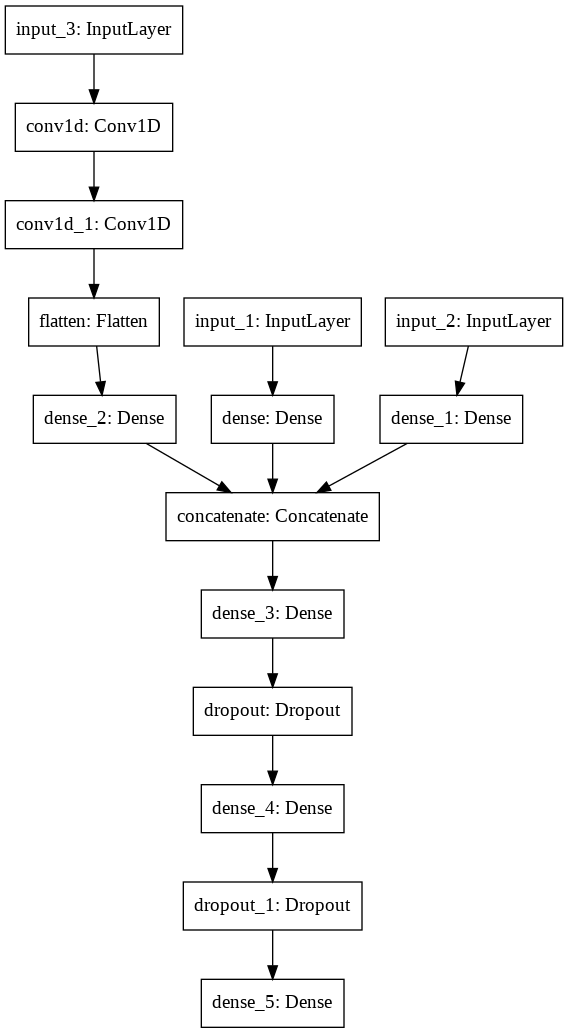

In [ ]:
test_output = []
for i,(train_index,test_index) in enumerate(kf.split(train_imp_features,y)):    
    xtr_2,xvl_2 = train_ind_val[train_index],train_ind_val[test_index]
    xtr_3,xvl_3 = train_car_val[train_index],train_car_val[test_index]
    xtr_c,xvl_c = train_ex_cat_cols_val[train_index],train_ex_cat_cols_val[test_index]

    ytr,yvl = y[train_index],y[test_index]

    
    

    for j in range(3):
        model = mlp()
        es_acc = EarlyStopping(monitor='val_auc_', mode='max', verbose=1, patience=15)   
        filepath="best_model_weights"+str(i)+".hdf5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_auc_', save_best_only=True, mode='max')
        callback_list = [es_acc,checkpoint]
        model.fit([xtr_2,xtr_3,xtr_c], ytr, batch_size=2048, epochs=200, verbose=1,
           validation_data=([xvl_2,xvl_3,xvl_c],yvl),callbacks=callback_list) 
    
        model.load_weights("best_model_weights"+str(i)+".hdf5")
        test_output.append(model.predict([test_ind_val,test_car_val,test_ex_cat_cols_val]))
    

test_out = np.mean(test_output, axis=0)


In [1]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","gini"]

x.add_row(["XGBoost ensemble", 0.27891])
x.add_row(["NN", 0.27502])

print(x)

+------------------+---------+
|      Model       |   gini  |
+------------------+---------+
| XGBoost ensemble | 0.27891 |
|        NN        | 0.27502 |
+------------------+---------+


<h2>Steps</h2>

<p>1.Firstly EDA is performed from that it is understood that dataset is imbalanced.</p>
<p>2.From the description of the problem missing values are represented with -1</p>
<p>3.Filled missing values by using models linear regression and logistic regression.</p>
<p>4.Categorical values are converted into one hot encoded.</p>
<p>5.Trained different models.</p>
<p>6.auc metric is used because the dataset is imbalanced</p>